# Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

#random seed dovoľuje numpy generovať pseudo náhodné hodnoty.
np.random.seed(0)

# Dataset (MNIST)

In [2]:
from keras.datasets import mnist
#načítanie datasetu mnist do premenných z databázy Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#výpis dimenzií jednotlivých premenných pre kontrolu správnosti načítania datasetu
#máme 60000 obrázkov číslic 28x28 a 60000 labelov v trénovacej množine
# a v testovacej množine máme 10000 hodnôt
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Vizualizovanie datasetu

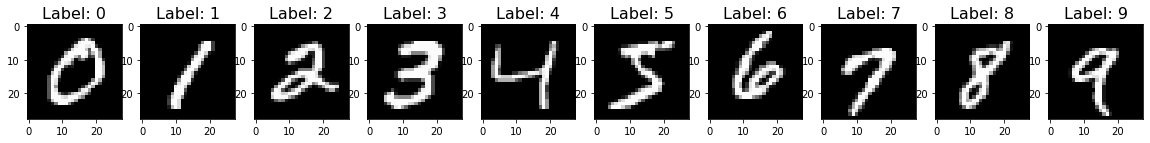

In [4]:
num_classes = 10 #pre vizualizovanie čísiel 0-9
f, ax = plt.subplots(1, num_classes, figsize=(20,20))#1 riadok, num_classes stlpcov a veľkosť grafu je 20x20

for i in range(0, num_classes): #0 až 10 (num_classes)
  sample = x_train[y_train == i][0] # vyberieme obrázok z x_train kde sa y_train(label) rovná i a vyberieme vždy prvý obrázok
  ax[i].imshow(sample, cmap='gray') #zobrazenie obrázku v každom grafe, grayscale
  ax[i].set_title("Label: {}".format(i), fontsize=16) #zobrazenie labelu nad každým grafom s prislúchajúcou hodnotou

In [5]:
#vypis labelov
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


Pre klasifikovanie číslic musíme zmeniť labely z čísiel na samostatné classy, pretože ak by nejaká hodnota bola klasifikaná ako niečo medzi 4 a 5 tak label by bol 4,5 ale my chceme vidieť ku ktorej hodnote sa to najviac blíži.

In [6]:
#konvertovaie labelov z celých čisiel na binárnu maticu pre presné klasifikovanie
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
#vypis labelov po konvertovaní 
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Príprava datasetu
Dáta si najskôr musíme normalizovať aby sa zjednodušili výpočty neurónovej siete a aby boli menšie odchýlky. Moje dáta majú hodnoty od 0 po 255(RGB hodnoty obrázkov), takže trénovacie dáta vydelíme hodnotou 255 aby sme dostali hodnoty od 0 po 1 na miesto hodnôt od 0 po 255

In [8]:
#normalizácia hodnôt
x_train = x_train / 255.0
x_test = x_test / 255.0

Potrebujeme pretvarovať dáta, pretože teraz má každý obrázok rozmery 28x28 ale ak ich chceme poslať do neurónovej siete na spracovanie, musíme ich pretvarovať na jeden dlhý vektor(v tomto prípade bude mať veľkosť 784).

In [9]:
#pretvarovanie dát
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Vytvorenie modelu plne prepojenej neurónovej siete
- Sequential() z kerasu vytvára model neurónovej siete, do ktorej je možno vytvoriť vrstvy, ktoré májú jeden vstup a jeden       výstup a taktiež sa napájajú len na nasledújucu vrstvu(nemôžu sa napájať na ktorúkoľvek vrstvu, na to slúži Functional()       model.)

In [10]:
model = Sequential()
# na vstupnej vrstve sa nachádza 784 neurónov(1 pre každý pixel obrázka)
# 2 skryté vrstvy, ktore obsahujú 128 neurónov
model.add(Dense(units = 128, input_shape = (784,), activation = "relu"))
model.add(Dense(units = 128, activation="relu"))
model.add(Dropout(0.30)) # 30% neurónov bude neaktívnych počas trénovania, aby sa predišlo pretrénovaniu neurónovej siete
# na výstupnej vrstve sa nachádza 10 neurónov(1 pre každú číslicu)
model.add(Dense(units=num_classes, activation="softmax"))

# pripravenie modelu na trénovanie(loss caterorical_crossentropy sa používa pri klasifikácií, ktorá obsahuje viac ako 2 triedy,
# v našom prípade je to 10 tried (číslice od 0-9),
# optimizer adam je technika učenia sa siete, mení hodnoty váh na základe trénovacej množiny, 
# metrics je zoznam hodnôt, ktoré sa majú vyhodnotiť, u nás je to presnosť)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#vypis poctu vstupnych a vystupnych hodnot v kazdej vrstve
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
model.summary()

dense (None, 784) ==> (None, 128)
dense_1 (None, 128) ==> (None, 128)
dropout (None, 128) ==> (None, 128)
dense_2 (None, 128) ==> (None, 10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Trénovanie neurónovej siete
V jednej epoche pri batch_size = 512 prejde neurónová sieť celý dataset za 118 iterácií, Pri každej epoche prepočíta váhy a pokračuje kým neprejde všetky epochy.

In [11]:
batch_size = 512 # počet obrázkov, spracovávaných neurónovou sieťou v jednom momente
epochs = 10 # počet epôch
#fit slúži na natrénovanie modelu na trénovacích dátach
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, shuffle = True, validation_data=(x_test, y_test), verbose = 2)

Epoch 1/10
118/118 - 2s - loss: 0.6295 - accuracy: 0.8173 - val_loss: 0.2310 - val_accuracy: 0.9324
Epoch 2/10
118/118 - 0s - loss: 0.2354 - accuracy: 0.9317 - val_loss: 0.1717 - val_accuracy: 0.9489
Epoch 3/10
118/118 - 1s - loss: 0.1723 - accuracy: 0.9505 - val_loss: 0.1337 - val_accuracy: 0.9602
Epoch 4/10
118/118 - 0s - loss: 0.1381 - accuracy: 0.9595 - val_loss: 0.1139 - val_accuracy: 0.9642
Epoch 5/10
118/118 - 0s - loss: 0.1128 - accuracy: 0.9665 - val_loss: 0.0978 - val_accuracy: 0.9699
Epoch 6/10
118/118 - 0s - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.0920 - val_accuracy: 0.9723
Epoch 7/10
118/118 - 0s - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.0851 - val_accuracy: 0.9739
Epoch 8/10
118/118 - 0s - loss: 0.0732 - accuracy: 0.9784 - val_loss: 0.0827 - val_accuracy: 0.9759
Epoch 9/10
118/118 - 0s - loss: 0.0655 - accuracy: 0.9809 - val_loss: 0.0776 - val_accuracy: 0.9767
Epoch 10/10
118/118 - 0s - loss: 0.0564 - accuracy: 0.9832 - val_loss: 0.0755 - val_accuracy: 0.9768

In [12]:
print(history.history.keys()) # kľúčové hodnoty z nášho modelu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Vyhodnotenie testovacej množiny
Na našu natrénovanú neurónovú sieť použijeme testovacie dáta a zistíme, aká presná je naša sieť.

In [13]:
#výpočet chybovosti a presnosti nášho modelu na základe testovacích dát
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print("Chybovosť testovacej množniny: {}, Presnosť testovacej množniny: {}".format(round(test_loss, 3), round(test_acc, 3)))

Chybovosť testovacej množniny: 0.075, Presnosť testovacej množniny: 0.977


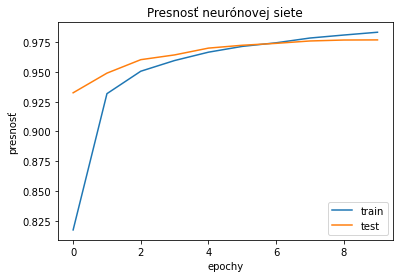

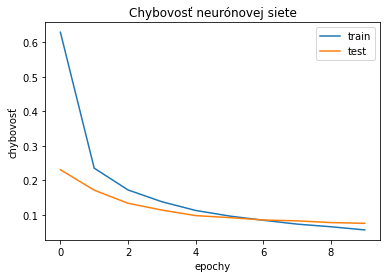

In [14]:
#graf prenosti trénovacej aj testovacej množiny v našej neurónovej sieti
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Presnosť neurónovej siete')
plt.ylabel('presnosť')
plt.xlabel('epochy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#graf chybovosti trénovacej aj testovacej množiny v našej neurónovej sieti
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Chybovosť neurónovej siete')
plt.ylabel('chybovosť')
plt.xlabel('epochy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [15]:
y_pred = model.predict(x_test) # vráti pole, obsahujúce pravdepodnost či každý prvok patrí nejakej triede(0-9)
y_pred_classes = np.argmax(y_pred, axis=1) # vráti nám 1D pole hodnôt, ktoré mali najvyššiu pravdepodobnosť, že boli správne
# predpovedané hodnoty
print(y_pred)
print(y_pred_classes)

[[1.7729415e-06 5.9037320e-06 5.7970439e-05 ... 9.9929333e-01
  7.2292455e-06 3.2123779e-05]
 [5.1956260e-07 6.1589625e-04 9.9916983e-01 ... 2.4429238e-07
  5.6075896e-06 1.3260288e-09]
 [6.6726864e-07 9.9855584e-01 2.8081355e-04 ... 8.2340947e-04
  1.0129737e-04 2.0708912e-06]
 ...
 [1.4902275e-10 1.1939433e-08 8.3584618e-11 ... 1.3933151e-05
  1.3940255e-06 6.8086229e-05]
 [2.6554616e-08 1.2584005e-07 2.4899012e-09 ... 1.0536282e-07
  1.4678609e-04 1.9945423e-09]
 [7.5296875e-08 1.9648385e-09 5.5332151e-08 ... 3.7954064e-11
  1.2807837e-08 4.6715652e-11]]
[7 2 1 ... 4 5 6]


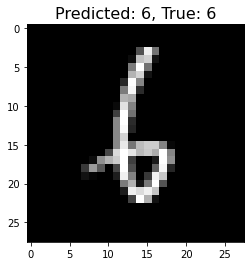

In [16]:
#Príklad na jednej hodnote
random_idx = np.random.choice(len(x_test))# výber náhodného indexu z x_test množiny
x_sample = x_test[random_idx] # výber hodnoty z test množiny na random_idx indexe(samotný obrázok)
y_true = np.argmax(y_test, axis=1) # číslené hodnoty labelov testovacej množiny
y_sample_true = y_true[random_idx] #naozajstná hodnota vykreslovanej číslice v grafe
y_sample_pred_class = y_pred_classes[random_idx] # predpovedaná hodnota vykreslovanej číslice v grafe

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')

Graf zobrazujúci koľko krát sme správne klasifikovali číslicu, aj koľko krát sme nesprávne klasifikovali a čo bola tá nesprávna hodnota

Text(0.5, 1.0, 'Confusion matrix')

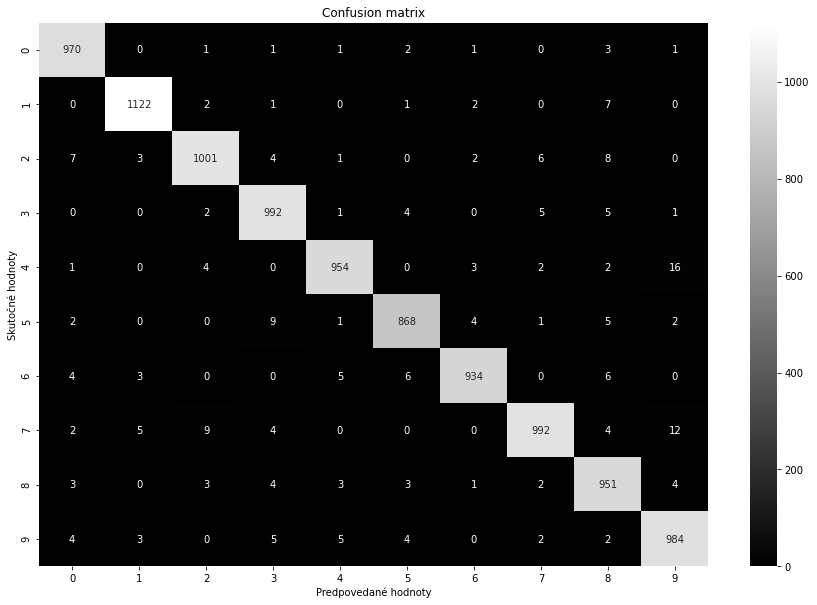

In [17]:
conf_mtx = confusion_matrix(y_true, y_pred_classes)# vytvorenie matice zámen zo skutočných a predikovaných hodnôt

#Nastevie grafu
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(conf_mtx, annot=True, fmt='d', ax=ax, cmap="gray")
ax.set_xlabel('Predpovedané hodnoty')
ax.set_ylabel('Skutočné hodnoty')
ax.set_title('Confusion matrix')

# Najčastejšie zle klasifikované číslice

In [18]:
errors = (y_pred_classes - y_true != 0) # v errors su rozdielne hodnoty medzi množinami y_pred_classes a y_true
#chyby v množinách y_pred_classes_errors, y_pred, y_true a x_test
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [19]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#List indexov najvacsich rozdielov v klasifikacii
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #top 5 errorov

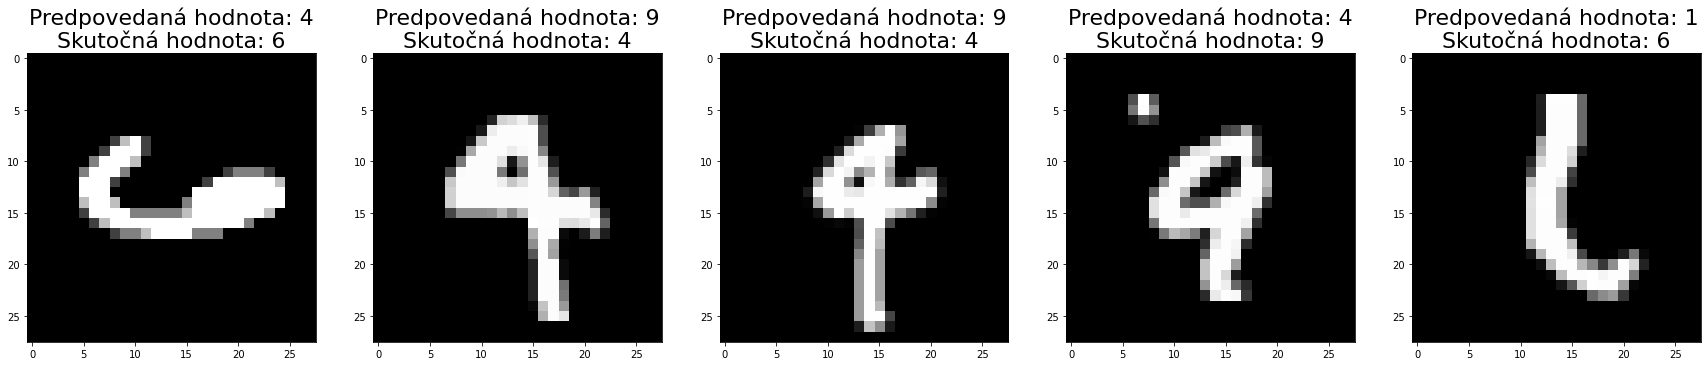

In [20]:
#vykreslenie najčastejších zle klasifikovaných obrázkov
num = len(top_idx_diff_errors)

f, ax = plt.subplots(1, num, figsize=(30, 30))
for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28,28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap='gray')
    ax [i].set_title("Predpovedaná hodnota: {}\nSkutočná hodnota: {}".format(y_p, y_t), fontsize=22)